# Chapter 4 Numpy basics Teaching Outline



In [13]:
import numpy as np

***
## key features
- introduction to ndarray
- ufunctions
- index and slice-mapping
- linear algebra
- random number generation
- API * optional
***
## 4.1 Introduction to ndarray-multidimensional array

ndarray do one-on-one mathematical operations on two arrays
```python
data = np.random.randn(2, 3)
data * 10
```
### 4.1.1 Create ndarrays

`create a list -> transform to a numpy array -> properties of array`
```python
x = [6, 7.5, 8, 0, 1]
arr = np.array(x)
arr.ndim
arr.shape
arr.dtype or np.array(array_value, dtype= )
np.zeros()
np.ones()
np.empty()
np.arrange()
```
|Function|Description|
---------|------------
|asarray|convert input to ndarray|
|astype|convert to another type|
|full|Produce an array of the given shape and dtype with all values set to the indicated “fill value”|
|eye|Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)|

### 4.1.2 Arithmetic operations
The key is vectorization
```python
arr*arr # element-wise operations between equal-size arrays
1/arr # propagate scalar argument to each element
arr2>arr # generate boolean arrays
```
### 4.1.3 Indexing and Slicing
Array slices are views on the original array,modify the view will reflected in the source array
#### one dimension indexing
```python
arr = np.arange(10)
arr_slice = arr[ 5:8 ]
arr_slice[1] = 12345
arr[ : ]=64 # assign to all values in an array
copyarr = arr[ 5:8 ].copy()  # copy to new array
```
#### multidimensional indexing
##### 2D version

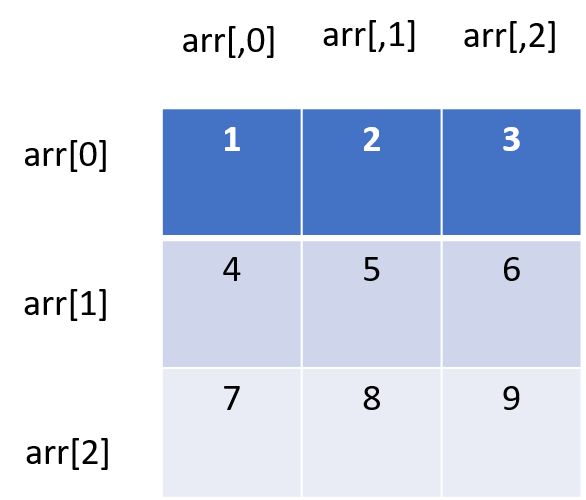

##### 3D version
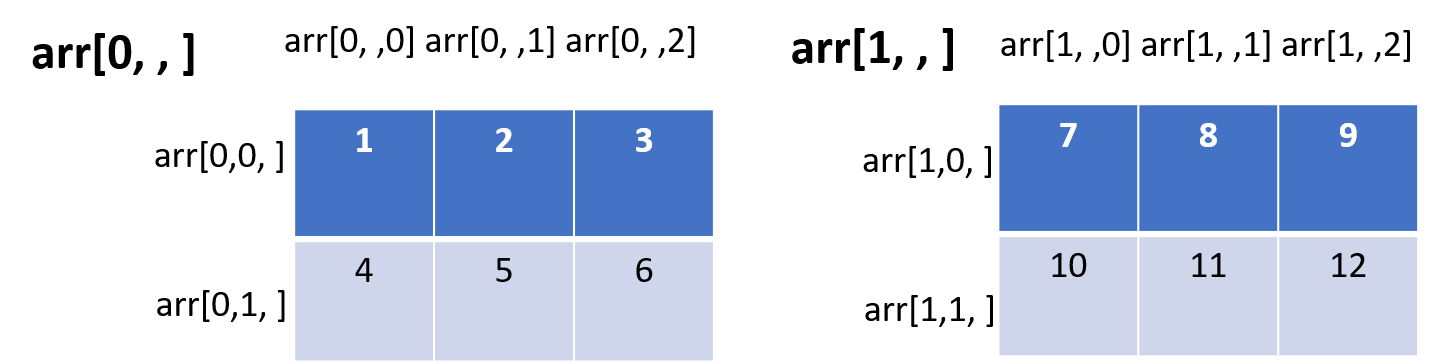

#### Indexing with slices
One can slice any element and consecutive elements
<br> You can select elements wit a list
```python
arr[start : stop ]
# start included, stop not included
# start empty means start from 0
# stop empty means stop at the end
```
#### Boolean indexing

`arr[1,2,[False,True,False,True,False,True,..]]`

#### Fancy indexing
When using fancy indexing, copy data into a new array
```python
arr[1,2,[1,3,5,6]] 
arr[[4,3,0,6]]
arr[[-3,-5,-7]]
arr[[1,2,7,2]][ : ,[0,3,1,2]]
```
### 4.1.4 Transposing Arrays and Swapping Axes
Using the following functions to reshape matrices
```python
arr.T
np.dot(arr.T,arr)
arr.transpose
arr.swapaxes()
```
***
## 4.2 Universal function:Fast Element-Wise Array Function

```python
	np.sqrt()
	np.exp()
	np.maximum(x,y) -find the maximum element wise
	remainder,whole_part = np.modf(arr)
	np.sqrt(arr,arr) # the second argument is to assign the result to a array
```
see table 4.3 and 4.4 for more ufunctions
## 4.3 Array-oriented programming with Arrays

### 4.3.1 np.meshgrid()

See the following example

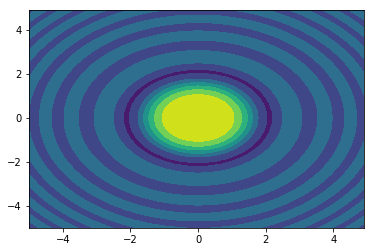

In [14]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

###  4.3.2 np.where()
This is equal to` x if condition else y`

### 4.3.3 Basic array statistical methods
```python
   np.random.randn()
	arr.mean()
	arr.sum()
	arr.cumsum()
	arr.cumprod()
	arr.min()
	arr.max()
	arr.argmin() # axis =1 means by column ,axis =0 means by row
```
see table 4.5 for more on statistical methods

### 4.3.4 Boolean and set logic
```python
(boolean operation).sum()
arr.any()
arr.all()
np.unique()
intersect1(x,y)
union1d(x,y)
in1d(x,y)
setdiff1d(x,y)
setxor1d(x,y)
```
### 4.3.5 Sorting
```python
np.sort(arr)
arr.sort()
arr[int(0.05*len(arr))]# 5 quantile
```
***
## 4.4 File input and output with arrays
```python
np.save('file_name', array_name)
np.savez('file_name', a= arr, b= arr2,..)
np.load('file_name.npy')
np.savez_compressed() # for compressed data
```
***
## 4.5 Linear Algebra
numpy.linalg has a standard set of matrix decompositions,see table 4.7 for some most used linear algebra functions.  
For example,To produce dot product, use the following:
<br>`x.dot(y) or np.dot(x,y) or x@np.ones(n)`
***
## 4.6 Pseudorandom Number Generation
use`np.random.normal` to generate numbers with standard normal distribution  
To generate numbers with other distributions, use table 4.8  

Function|Description
-------------|-------
seed| Seed the random number generator
permutation| Return a random permutation of a sequence, or return a permuted range
shuffle| Randomly permute a sequence in-place
rand| Draw samples from a uniform distribution
randint| Draw random integers from a given low-to-high range
randn| Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface)
binomial| Draw samples from a binomial distribution
normal| Draw samples from a normal (Gaussian) distribution
beta| Draw samples from a beta distribution
chisquare| Draw samples from a chi-square distribution
gamma| Draw samples from a gamma distribution
uniform| Draw samples from a uniform [0, 1) distribution
***
## 4.7 Example: Random Walks

Simple random walks is a one dimensional Markov chain  
### 4.7.1 Single random walk with 1000 steps with built-in random module code

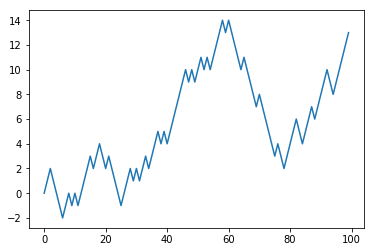

In [15]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

### 4.7.2 Single random walk with 1000 steps with numpy methods 

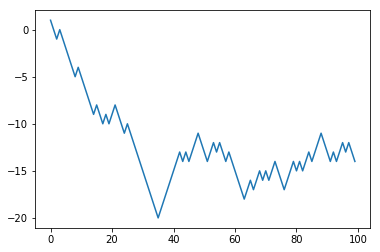

In [16]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:100])

Extract statistics from the walk  
```python
walk.min() # minimum value
walk.max() # maximum value
(np.abs(walk) >= 10).argmax() # First crossing time
```
### 4.7.3 Multiple random walks (5000) with 1000 steps with numpy methods


In [17]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ..., -24, -25, -26],
       [  1,   0,  -1, ...,  40,  39,  38],
       [  1,   0,   1, ..., -14, -15, -16],
       ...,
       [ -1,  -2,  -3, ...,  10,   9,  10],
       [ -1,  -2,  -3, ...,  -4,  -3,  -2],
       [  1,   2,   3, ..., -24, -23, -24]], dtype=int32)

Extract statistics from the walk  
```python
walks.min() # minimum value
walks.max() # maximum value
hits30 = (np.abs(walks) >= 30).any(1)
hits30.sum() # Number that hit 30 or -30
```

## 4.8 Exercises 
[100 Numpy exercises](https://github.com/rougier/numpy-100.git)

## 4.9 References
[Python for Data Analysis](https://www.amazon.ca/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)  
[numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)  
[numpy.random.ranint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)

